In [46]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/my-dataset/credit_train.csv
/kaggle/input/my-dataset/credit_test.csv


In [2]:
dtrain=pd.read_csv('/kaggle/input/my-dataset/credit_train.csv')
dtest=pd.read_csv('/kaggle/input/my-dataset/credit_test.csv')

In [ ]:
dtrain.head()

In [ ]:
dtrain.shape, dtest.shape

In [3]:
# dropping the samples whose target (loan status) having missing values
dtrain=dtrain.drop(dtrain['Loan Status'][dtrain['Loan Status'].isna()].index)

In [4]:
dtrain['Loan Status'][dtrain['Loan Status'].isna()]

Series([], Name: Loan Status, dtype: object)

In [7]:
X=dtrain.iloc[:,2:]
dtest=dtest.iloc[:,2:]

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 17 columns):
Loan Status                     100000 non-null object
Current Loan Amount             100000 non-null float64
Term                            100000 non-null object
Credit Score                    80846 non-null float64
Annual Income                   80846 non-null float64
Years in current job            95778 non-null object
Home Ownership                  100000 non-null object
Purpose                         100000 non-null object
Monthly Debt                    100000 non-null float64
Years of Credit History         100000 non-null float64
Months since last delinquent    46859 non-null float64
Number of Open Accounts         100000 non-null float64
Number of Credit Problems       100000 non-null float64
Current Credit Balance          100000 non-null float64
Maximum Open Credit             99998 non-null float64
Bankruptcies                    99796 non-null float64
Tax L

In [9]:
# credit score range is 300-850, above than 850s or less than 300s are outliers
X[X['Credit Score']>850].shape, dtest[dtest['Credit Score']>850].shape,

((4551, 17), (453, 16))

In [10]:
# removing outliers
X=X.drop(X[X['Credit Score']>850].index)
dtest=dtest.drop(dtest[dtest['Credit Score']>850].index)

In [11]:
from sklearn.impute import SimpleImputer

In [12]:
cat=[]
nom=[]
for i in X:
    if X[i].dtype=='object':
        cat.append(i)
    else:
        nom.append(i)
cat=cat[1:]
# remove target

In [13]:
# imputer for nominal (on mean value), for categorical (on most_frequent value)
nominal_imp=SimpleImputer(strategy='mean')
cat_imp=SimpleImputer(strategy='most_frequent')

In [14]:
def impute(df):
    for i in cat:
        df[i]=cat_imp.fit_transform(df[i][:,np.newaxis])
    for i in nom:
        df[i]=nominal_imp.fit_transform(df[i][:,np.newaxis])
    return df

In [15]:
X=impute(X)
dtest=impute(dtest)

In [17]:
X.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.00000,1.167493e+06,8 years,Home Mortgage,Home Improvements,5214.74,17.2,34.923067,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,716.61523,1.382671e+06,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.000000,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.00000,2.231892e+06,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.000000,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.00000,8.069490e+05,3 years,Own Home,Debt Consolidation,8741.90,12.0,34.923067,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,716.61523,1.382671e+06,5 years,Rent,Debt Consolidation,20639.70,6.1,34.923067,15.0,0.0,253460.0,427174.0,0.0,0.0


In [38]:
def target_based_barchart(df, feature):
    fully_paid=df[feature][df['Loan Status']=='Fully Paid'].value_counts()
    charged_off=df[feature][df['Loan Status']=='Charged Off'].value_counts()
    d=pd.DataFrame([fully_paid,charged_off])
    d.index=['Fully Paid','Charged Off']
    d.plot(kind='bar',stacked=True)

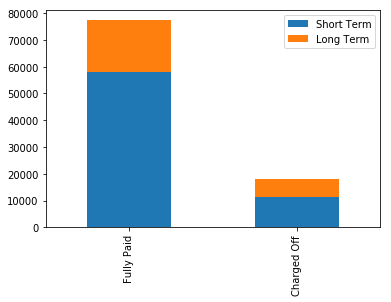

In [39]:
target_based_barchart(X,'Term')

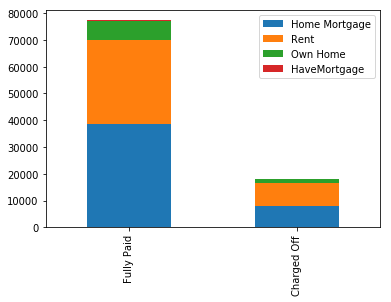

In [40]:
target_based_barchart(X,'Home Ownership')

In [44]:
X.groupby(['Term','Loan Status'])['Annual Income'].mean()

Term        Loan Status
Long Term   Charged Off    1.394694e+06
            Fully Paid     1.544158e+06
Short Term  Charged Off    1.233833e+06
            Fully Paid     1.356517e+06
Name: Annual Income, dtype: float64

In [ ]:
X.info()

In [ ]:
X.head(2)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X.groupby(['Term','Loan Status'])['Loan Status'].count()

In [ ]:
sns.catplot('Loan Status', col='Term', data=X, kind='count')

In [ ]:
X['Years in current job'].unique()

In [ ]:
X['Years in current job']=X['Years in current job'].map({'8 years':8, '10+ years':10, '3 years':3, '5 years':5, '< 1 year':0,
       '2 years':2, '4 years':4, '9 years':9, '7 years':7, '1 year':1, '6 years':6})

dtest['Years in current job']=dtest['Years in current job'].map({'8 years':8, '10+ years':10, '3 years':3, '5 years':5, '< 1 year':0,
       '2 years':2, '4 years':4, '9 years':9, '7 years':7, '1 year':1, '6 years':6})

In [ ]:
dtest['Years in current job'].value_counts()

In [ ]:
cat

In [ ]:
cat.remove(cat[1])

In [ ]:
def enc(df):
    for i in cat:
        df=pd.concat([df, pd.get_dummies(df[i], prefix=i, drop_first=True)], 1)
        df=df.drop(i,axis=1)
    return df

In [ ]:
X=enc(X)
dtest=enc(dtest)

In [ ]:
X.head(2)

In [ ]:
from copy import deepcopy
X1=deepcopy(X)
dt1=deepcopy(dtest)

In [ ]:
features=X1.iloc[:,1:]
target=X1['Loan Status']

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [ ]:
x_train, x_val, y_train, y_val=train_test_split(features, target, shuffle=False)
x_test=dt1

### scaling

In [ ]:
scale=StandardScaler()
features=scale.fit_transform(features)
dt1=scale.fit_transform(dt1)

In [ ]:
kf= KFold(n_splits=10, shuffle=False)

### LogisticRegression

In [ ]:
model=LogisticRegression()
score=cross_val_score(model, features, target, scoring='accuracy', cv=kf)
print(score)
print('avg score:', round(np.mean(score)*100),2)

In [ ]:
#model=KNeighborsClassifier(10)
#score=cross_val_score(model, features, target, scoring='accuracy', cv=kf)
#print(score)
#print('avg score:', round(np.mean(score)*100),2)

In [ ]:
model=RandomForestClassifier()
score=cross_val_score(model, features, target, scoring='accuracy', cv=kf)
print(score)
print('avg score:', round(np.mean(score)*100),2)

### Testing

In [ ]:
model=LogisticRegression()
model.fit(x_train, y_train)
ypred=model.predict(x_test)